In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the car data from csv file

import pandas as pd
data=pd.read_csv(r'C:\Users\hbhat\OneDrive\Desktop\VScode\Capstoneproject3\Jaipur.csv')
data

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Top Speed,Acceleration,Tyre Type,Alloy Wheel Size,No Door Numbers,Cargo Volumn,Gross Weight,BoreX Stroke,Compression Ratio,Ground Clearance Unladen
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,...,180 Kmph,11.9 Seconds,Tubeless,16,5,295-litres,NaN,NaN,NaN,NaN
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,...,180 Kmph,11.9 Seconds,"Radial, Tubeless",16,5,268,1335,NaN,NaN,NaN
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,...,150 Kmph,15.05 Seconds,"Tubeless, Radial",16,5,235-litres,1250kg,73 X 82 mm,11.0:1,NaN
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,...,165 Kmph,12.9 Seconds,Tubeless,16,5,256,1250kg,73 X 82 mm,11.0:1,NaN
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,...,152 kmph,18.6 Seconds,Tubeless Tyres,16,5,180-liters,1350kg,69 x 72 mm,11.0:1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Chevrolet,Chevrolet Beat,2011,...,182 Kmph,13.5 Seconds,"Tubeless,Radial",14,5,170-litres,1740kgs,73.5 X 88.3 mm,16.0:1,160
1116,0,Petrol,Hatchback,"70,000",Manual,1,1st Owner,Maruti,Maruti Alto,2007,...,137km/hr,17.7 seconds,"Tubeless,Radial",12,5,170-litres,1140kg,68.5 x 72.0 mm,16.0:1,160
1117,0,Petrol,SUV,"20,000",Manual,1,1st Owner,Renault,Renault Kiger,2022,...,137km/hr,17.7 seconds,"Tubeless, Radial",16,5,405,1140kg,68.5 x 72.0 mm,16.0:1,160
1118,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Alto,2009,...,137km/hr,17.7 seconds,"Tubeless,Radial",12,5,405,1140kg,68.5 x 72.0 mm,16.0:1,160


In [3]:
#check for null records
data.isnull().sum()

it                           0
ft                           0
bt                           0
km                           0
transmission                 0
                            ..
Cargo Volumn                 0
Gross Weight                 1
BoreX Stroke                 2
Compression Ratio            2
Ground Clearance Unladen    15
Length: 68, dtype: int64

In [4]:
#column names
data.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Engine Displacement', 'Fuel Type', 'Insurance Validity', 'Kms Driven',
       'Ownership', 'RTO', 'Registration Year', 'Seats', 'Transmission',
       'Year of Manufacture', 'Features', 'Mileage', 'Engine', 'Max Power',
       'Torque', 'Wheel Size', 'Seats.1', 'Color', 'Engine Type',
       'Displacement', 'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'Turbo Charger',
       'Super Charger', 'Length', 'Width', 'Height', 'Wheel Base',
       'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gear Box', 'Drive Type',
       'Seating Capacity', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration',
       'Tyre Type', 'Alloy Wheel Size', 'No Door Numbers', 'C

In [5]:
# dropping columns post feature selection
Jaipur_final_data=data.drop(columns=['it', 'ft', 'transmission', 'owner', 'centralVariantId', 'variantName',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Engine Displacement', 'Kms Driven',
       'Ownership', 'RTO', 'Registration Year', 'Seats',
       'Year of Manufacture', 'Features',
       'Torque', 'Seats.1', 'Engine Type', 'Displacement',
       'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke',
       'Compression Ratio', 'Turbo Charger', 'Super Charger', 'Length',
       'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration',
       'Tyre Type', 'No Door Numbers', 'Cargo Volumn', 'Wheel Size',
       'Alloy Wheel Size', 'Ground Clearance Unladen'],inplace=True)



In [6]:
#selected features for further cleansing
data.columns

Index(['bt', 'km', 'ownerNo', 'oem', 'model', 'modelYear', 'price',
       'Fuel Type', 'Insurance Validity', 'Transmission', 'Mileage', 'Engine',
       'Max Power', 'Color', 'Seating Capacity'],
      dtype='object')

In [7]:
data.isnull().sum()  # check for null records 

bt                    0
km                    0
ownerNo               0
oem                   0
model                 0
modelYear             0
price                 0
Fuel Type             0
Insurance Validity    0
Transmission          0
Mileage               0
Engine                0
Max Power             0
Color                 0
Seating Capacity      0
dtype: int64

In [8]:
data.dtypes

bt                    object
km                    object
ownerNo                int64
oem                   object
model                 object
modelYear              int64
price                 object
Fuel Type             object
Insurance Validity    object
Transmission          object
Mileage               object
Engine                object
Max Power             object
Color                 object
Seating Capacity       int64
dtype: object

In [9]:
# column name renaming -standaradization
dict={'bt':'Car_type',
      'km':'Kms_driven',
      'ownerNo':'No_of_owners',
      'model':'Car_model',
      'oem':'Car_name',
      'modelYear':'Model_Year',
      'price':'Car_price',
      'Fuel Type':'Fuel_type',
      'Insurance Validity':'Insurance_type',
      'Seating Capacity':'Seating_capacity',
      'Max Power':'Max_power'
      }
data.rename(columns =dict , inplace = True)


data

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity
0,Hatchback,"1,20,000",2,Hyundai,Hyundai i20,2015,₹ 5.10 Lakh,Diesel,Third Party insurance,Manual,22.54 kmpl,1396 CC,88.73bhp@4000rpm,Others,5
1,Hatchback,"66,951",1,Maruti,Maruti Swift,2012,₹ 3.81 Lakh,Petrol,Third Party,Manual,22.38 kmpl,1197 CC,88.50bhp@6000rpm,White,5
2,Hatchback,"80,000",2,Maruti,Maruti Celerio,2016,₹ 3.20 Lakh,Petrol,Third Party insurance,Automatic,23.1 kmpl,998 CC,67.04bhp@6000rpm,Others,5
3,Hatchback,"44,392",1,Hyundai,Hyundai Grand i10,2017,₹ 4.20 Lakh,Petrol,Third Party insurance,Manual,18.9 kmpl,1197 CC,81.86bhp@6000rpm,Silver,5
4,Hatchback,"40,000",1,Maruti,Maruti Wagon R,2016,₹ 3.50 Lakh,Petrol,Third Party insurance,Automatic,20.51 kmpl,998 CC,67bhp@6000rpm,Silver,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,Hatchback,"1,20,000",1,Chevrolet,Chevrolet Beat,2011,₹ 1.08 Lakh,Petrol,Third Party insurance,Manual,18.6 kmpl,1199 CC,79.4bhp@6200rpm,Others,5
1116,Hatchback,"70,000",1,Maruti,Maruti Alto,2007,₹ 1.05 Lakh,Petrol,Third Party insurance,Manual,19.7 kmpl,796 CC,46.3bhp@6200rpm,Others,5
1117,SUV,"20,000",1,Renault,Renault Kiger,2022,₹ 8.50 Lakh,Petrol,Third Party insurance,Manual,19.17 kmpl,999 CC,71.01bhp@6250rpm,Others,5
1118,Hatchback,"40,000",1,Maruti,Maruti Alto,2009,₹ 1 Lakh,Petrol,Third Party insurance,Manual,19.7 kmpl,796 CC,46.3bhp@6200rpm,Others,5


In [10]:
# Function to convert lakh to numerical format
def convert_lakh_to_numeric(value):
    if 'lakh' in value:
        num = float(value.replace(' lakh', '').strip().replace(',', ''))
        return int(num * 100000)
    elif 'crore' in value:
        num = float(value.replace(' crore', '').strip().replace(',', ''))
        return int(num * 10000000)
    return value


In [11]:
# Function to extract and convert max power in PS to BHP 
import re
import numpy as np
def extract_and_convert(power_str):
    # Check for BHP
    bhp_match = re.search(r'(\d+\.?\d*)\s*bhp', power_str, re.IGNORECASE)
    if bhp_match:
        return float(bhp_match.group(1))  # Return BHP as float
    
    # Check for PS, allow for variations in format
    ps_match = re.search(r"(\d+(\.\d*)?)", power_str, re.IGNORECASE)
    if ps_match:
        print(f"{power_str} --> {ps_match}")
        ps_value = float(ps_match.group(1).replace(',', ''))  # Remove commas
        return ps_value * 0.98632  # Convert PS to BHP
    
    return np.nan  # Return NaN if no match

In [12]:
# Column data type conversion with regex replace to get numerical data
data['Max_power']=data['Max_power'].apply(extract_and_convert).astype(float)

110 @ 4,000 (PS@rpm) --> <re.Match object; span=(0, 3), match='110'>
177 @ 4,000 (PS@rpm) --> <re.Match object; span=(0, 3), match='177'>
102@3,600 (PS@rpm) --> <re.Match object; span=(0, 3), match='102'>
171 PS @ 3600 rpm --> <re.Match object; span=(0, 3), match='171'>
105PS @4000rpm  --> <re.Match object; span=(0, 3), match='105'>
144 @ 5,500 (PS@rpm) --> <re.Match object; span=(0, 3), match='144'>
90(66) @ 6200 --> <re.Match object; span=(0, 2), match='90'>
118PS at 6,600 rpm --> <re.Match object; span=(0, 3), match='118'>
171 PS @ 3600 rpm --> <re.Match object; span=(0, 3), match='171'>
102@3,600 (PS@rpm) --> <re.Match object; span=(0, 3), match='102'>
102@3,600 (PS@rpm) --> <re.Match object; span=(0, 3), match='102'>
78 @ 5,500 (PS@rpm) --> <re.Match object; span=(0, 2), match='78'>
70@4,500 (PS@rpm) --> <re.Match object; span=(0, 2), match='70'>
106@4,000 (PS@rpm) --> <re.Match object; span=(0, 3), match='106'>
90PS at 4000rpm --> <re.Match object; span=(0, 2), match='90'>
90PS a

In [13]:
# Column data type conversion with regex replace to get numerical data
data['Car_price'] = data['Car_price'].str.lower().replace(r'[^\d.a-zA-Z ]','',regex=True).apply(convert_lakh_to_numeric).astype(int)
data['Mileage']=data['Mileage'].str.lower().replace(r'[^\d.]','',regex=True).astype(float)
data['Kms_driven']=data['Kms_driven'].str.replace(r'[^\d]','',regex=True).astype(int)
data['Engine']=data['Engine'].str.replace(r'[^\d]','',regex=True).astype(int)
data

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity
0,Hatchback,120000,2,Hyundai,Hyundai i20,2015,509999,Diesel,Third Party insurance,Manual,22.54,1396,88.73,Others,5
1,Hatchback,66951,1,Maruti,Maruti Swift,2012,381000,Petrol,Third Party,Manual,22.38,1197,88.50,White,5
2,Hatchback,80000,2,Maruti,Maruti Celerio,2016,320000,Petrol,Third Party insurance,Automatic,23.10,998,67.04,Others,5
3,Hatchback,44392,1,Hyundai,Hyundai Grand i10,2017,420000,Petrol,Third Party insurance,Manual,18.90,1197,81.86,Silver,5
4,Hatchback,40000,1,Maruti,Maruti Wagon R,2016,350000,Petrol,Third Party insurance,Automatic,20.51,998,67.00,Silver,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,Hatchback,120000,1,Chevrolet,Chevrolet Beat,2011,108000,Petrol,Third Party insurance,Manual,18.60,1199,79.40,Others,5
1116,Hatchback,70000,1,Maruti,Maruti Alto,2007,105000,Petrol,Third Party insurance,Manual,19.70,796,46.30,Others,5
1117,SUV,20000,1,Renault,Renault Kiger,2022,850000,Petrol,Third Party insurance,Manual,19.17,999,71.01,Others,5
1118,Hatchback,40000,1,Maruti,Maruti Alto,2009,100000,Petrol,Third Party insurance,Manual,19.70,796,46.30,Others,5


In [14]:
data.columns

Index(['Car_type', 'Kms_driven', 'No_of_owners', 'Car_name', 'Car_model',
       'Model_Year', 'Car_price', 'Fuel_type', 'Insurance_type',
       'Transmission', 'Mileage', 'Engine', 'Max_power', 'Color',
       'Seating_capacity'],
      dtype='object')

In [49]:
data.dtypes

Car_type             object
Kms_driven            int64
No_of_owners          int64
Car_name             object
Car_model            object
Model_Year            int64
Car_price             int64
Fuel_type            object
Insurance_type       object
Transmission         object
Mileage             float64
Engine                int64
Max_power           float64
Color                object
Seating_capacity      int64
dtype: object

In [50]:
data.to_csv(r'C:\Users\hbhat\OneDrive\Desktop\VScode\Capstoneproject3\final_cleaned_csv_files\edited_JPdata.csv',encoding='utf-8',index=False)

In [51]:
data.shape

(1120, 15)

In [52]:
print(data['No_of_owners'].unique())

[2 1 3 5 4 0]


In [53]:
print(data['Transmission'].unique())

['Manual' 'Automatic']


In [54]:
print(data['Model_Year'].unique())

[2015 2012 2016 2017 2007 2011 2014 2013 2020 2023 2019 2021 2018 2022
 2010 2009 2006 2008 2001 1999 2005 1998 2004 2003 2002]


In [19]:
print(data['Fuel_type'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG' 'Electric']


In [20]:
print(data['Car_type'].unique())

['Hatchback' 'Sedan' 'SUV' 'MUV' 'Pickup Trucks' 'Minivans' 'Coupe']


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_type          1120 non-null   object 
 1   Kms_driven        1120 non-null   int64  
 2   No_of_owners      1120 non-null   int64  
 3   Car_name          1120 non-null   object 
 4   Car_model         1120 non-null   object 
 5   Model_Year        1120 non-null   int64  
 6   Car_price         1120 non-null   int64  
 7   Fuel_type         1120 non-null   object 
 8   Insurance_type    1120 non-null   object 
 9   Transmission      1120 non-null   object 
 10  Mileage           1120 non-null   float64
 11  Engine            1120 non-null   int64  
 12  Max_power         1120 non-null   float64
 13  Color             1120 non-null   object 
 14  Seating_capacity  1120 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 131.4+ KB


In [15]:
data.describe

<bound method NDFrame.describe of        Car_type  Kms_driven  No_of_owners   Car_name          Car_model  \
0     Hatchback      120000             2    Hyundai        Hyundai i20   
1     Hatchback       66951             1     Maruti       Maruti Swift   
2     Hatchback       80000             2     Maruti     Maruti Celerio   
3     Hatchback       44392             1    Hyundai  Hyundai Grand i10   
4     Hatchback       40000             1     Maruti     Maruti Wagon R   
...         ...         ...           ...        ...                ...   
1115  Hatchback      120000             1  Chevrolet     Chevrolet Beat   
1116  Hatchback       70000             1     Maruti        Maruti Alto   
1117        SUV       20000             1    Renault      Renault Kiger   
1118  Hatchback       40000             1     Maruti        Maruti Alto   
1119  Hatchback       80000             1     Maruti      Maruti Baleno   

      Model_Year  Car_price Fuel_type         Insurance_type Tran

In [16]:
data.describe()

,Kms_driven,No_of_owners,Model_Year,Car_price,Mileage,Engine,Max_power,Seating_capacity
count,1120.000000,1120.000000,1120.000000,1.120000e+03,1120.000000,1120.000000,1120.000000,1120.000000
mean,74015.608929,1.499107,2015.771429,6.971124e+05,19.801205,1370.208036,96.125852,5.195536
std,39750.459545,0.794305,4.357308,8.907479e+05,3.672377,461.621092,40.628126,0.668570
min,0.000000,0.000000,1998.000000,2.800100e+04,7.940000,0.000000,34.200000,4.000000
25%,43345.750000,1.000000,2013.000000,3.035000e+05,17.207500,1196.000000,72.300000,5.000000
50%,70000.000000,1.000000,2016.000000,5.000000e+05,19.810000,1248.000000,88.500000,5.000000
75%,100000.000000,2.000000,2019.000000,8.000000e+05,22.077500,1498.000000,108.620000,5.000000
max,251066.000000,5.000000,2023.000000,1.500000e+07,35.600000,4395.000000,450.000000,9.000000


In [17]:
# Descriptive statistical summary of categorical features
data.describe(include= 'object')

,Car_type,Car_name,Car_model,Fuel_type,Insurance_type,Transmission,Color
count,1120,1120,1120,1120,1120,1120,1120
unique,7,28,174,5,6,2,61
top,Hatchback,Maruti,Maruti Swift Dzire,Petrol,Third Party insurance,Manual,Others
freq,486,359,54,641,649,928,511


In [18]:
# calculating vehicle age as feature
from datetime import datetime

current_year = datetime.now().year

# Calculate age
data['Vehicle_age']= current_year - data['Model_Year']
data

,Car_type,Kms_driven,No_of_owners,Car_name,Car_model,Model_Year,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Color,Seating_capacity,Vehicle_age
0,Hatchback,120000,2,Hyundai,Hyundai i20,2015,509999,Diesel,Third Party insurance,Manual,22.54,1396,88.73,Others,5,9
1,Hatchback,66951,1,Maruti,Maruti Swift,2012,381000,Petrol,Third Party,Manual,22.38,1197,88.50,White,5,12
2,Hatchback,80000,2,Maruti,Maruti Celerio,2016,320000,Petrol,Third Party insurance,Automatic,23.10,998,67.04,Others,5,8
3,Hatchback,44392,1,Hyundai,Hyundai Grand i10,2017,420000,Petrol,Third Party insurance,Manual,18.90,1197,81.86,Silver,5,7
4,Hatchback,40000,1,Maruti,Maruti Wagon R,2016,350000,Petrol,Third Party insurance,Automatic,20.51,998,67.00,Silver,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,Hatchback,120000,1,Chevrolet,Chevrolet Beat,2011,108000,Petrol,Third Party insurance,Manual,18.60,1199,79.40,Others,5,13
1116,Hatchback,70000,1,Maruti,Maruti Alto,2007,105000,Petrol,Third Party insurance,Manual,19.70,796,46.30,Others,5,17
1117,SUV,20000,1,Renault,Renault Kiger,2022,850000,Petrol,Third Party insurance,Manual,19.17,999,71.01,Others,5,2
1118,Hatchback,40000,1,Maruti,Maruti Alto,2009,100000,Petrol,Third Party insurance,Manual,19.70,796,46.30,Others,5,15


In [19]:
# Feature Engineering steps

data_next=data.copy()

# dropping unnecessary features for further analysis

data_next.drop(columns= ['Car_name','Model_Year','Car_model','Color'],axis= 1, inplace= True) 
data_next

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age
0,Hatchback,120000,2,509999,Diesel,Third Party insurance,Manual,22.54,1396,88.73,5,9
1,Hatchback,66951,1,381000,Petrol,Third Party,Manual,22.38,1197,88.50,5,12
2,Hatchback,80000,2,320000,Petrol,Third Party insurance,Automatic,23.10,998,67.04,5,8
3,Hatchback,44392,1,420000,Petrol,Third Party insurance,Manual,18.90,1197,81.86,5,7
4,Hatchback,40000,1,350000,Petrol,Third Party insurance,Automatic,20.51,998,67.00,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1115,Hatchback,120000,1,108000,Petrol,Third Party insurance,Manual,18.60,1199,79.40,5,13
1116,Hatchback,70000,1,105000,Petrol,Third Party insurance,Manual,19.70,796,46.30,5,17
1117,SUV,20000,1,850000,Petrol,Third Party insurance,Manual,19.17,999,71.01,5,2
1118,Hatchback,40000,1,100000,Petrol,Third Party insurance,Manual,19.70,796,46.30,5,15


In [20]:
print("'Vehicle age' variable have {} unique category : {}".format(data_next['Vehicle_age'].nunique(), 
                                                                   data_next['Vehicle_age'].unique()))

'Vehicle age' variable have 25 unique category : [ 9 12  8  7 17 13 10 11  4  1  5  3  6  2 14 15 18 16 23 25 19 26 20 21
 22]


In [21]:
data_next.head()

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age
0,Hatchback,120000,2,509999,Diesel,Third Party insurance,Manual,22.54,1396,88.73,5,9
1,Hatchback,66951,1,381000,Petrol,Third Party,Manual,22.38,1197,88.50,5,12
2,Hatchback,80000,2,320000,Petrol,Third Party insurance,Automatic,23.10,998,67.04,5,8
3,Hatchback,44392,1,420000,Petrol,Third Party insurance,Manual,18.90,1197,81.86,5,7
4,Hatchback,40000,1,350000,Petrol,Third Party insurance,Automatic,20.51,998,67.00,5,8


Data Visualization

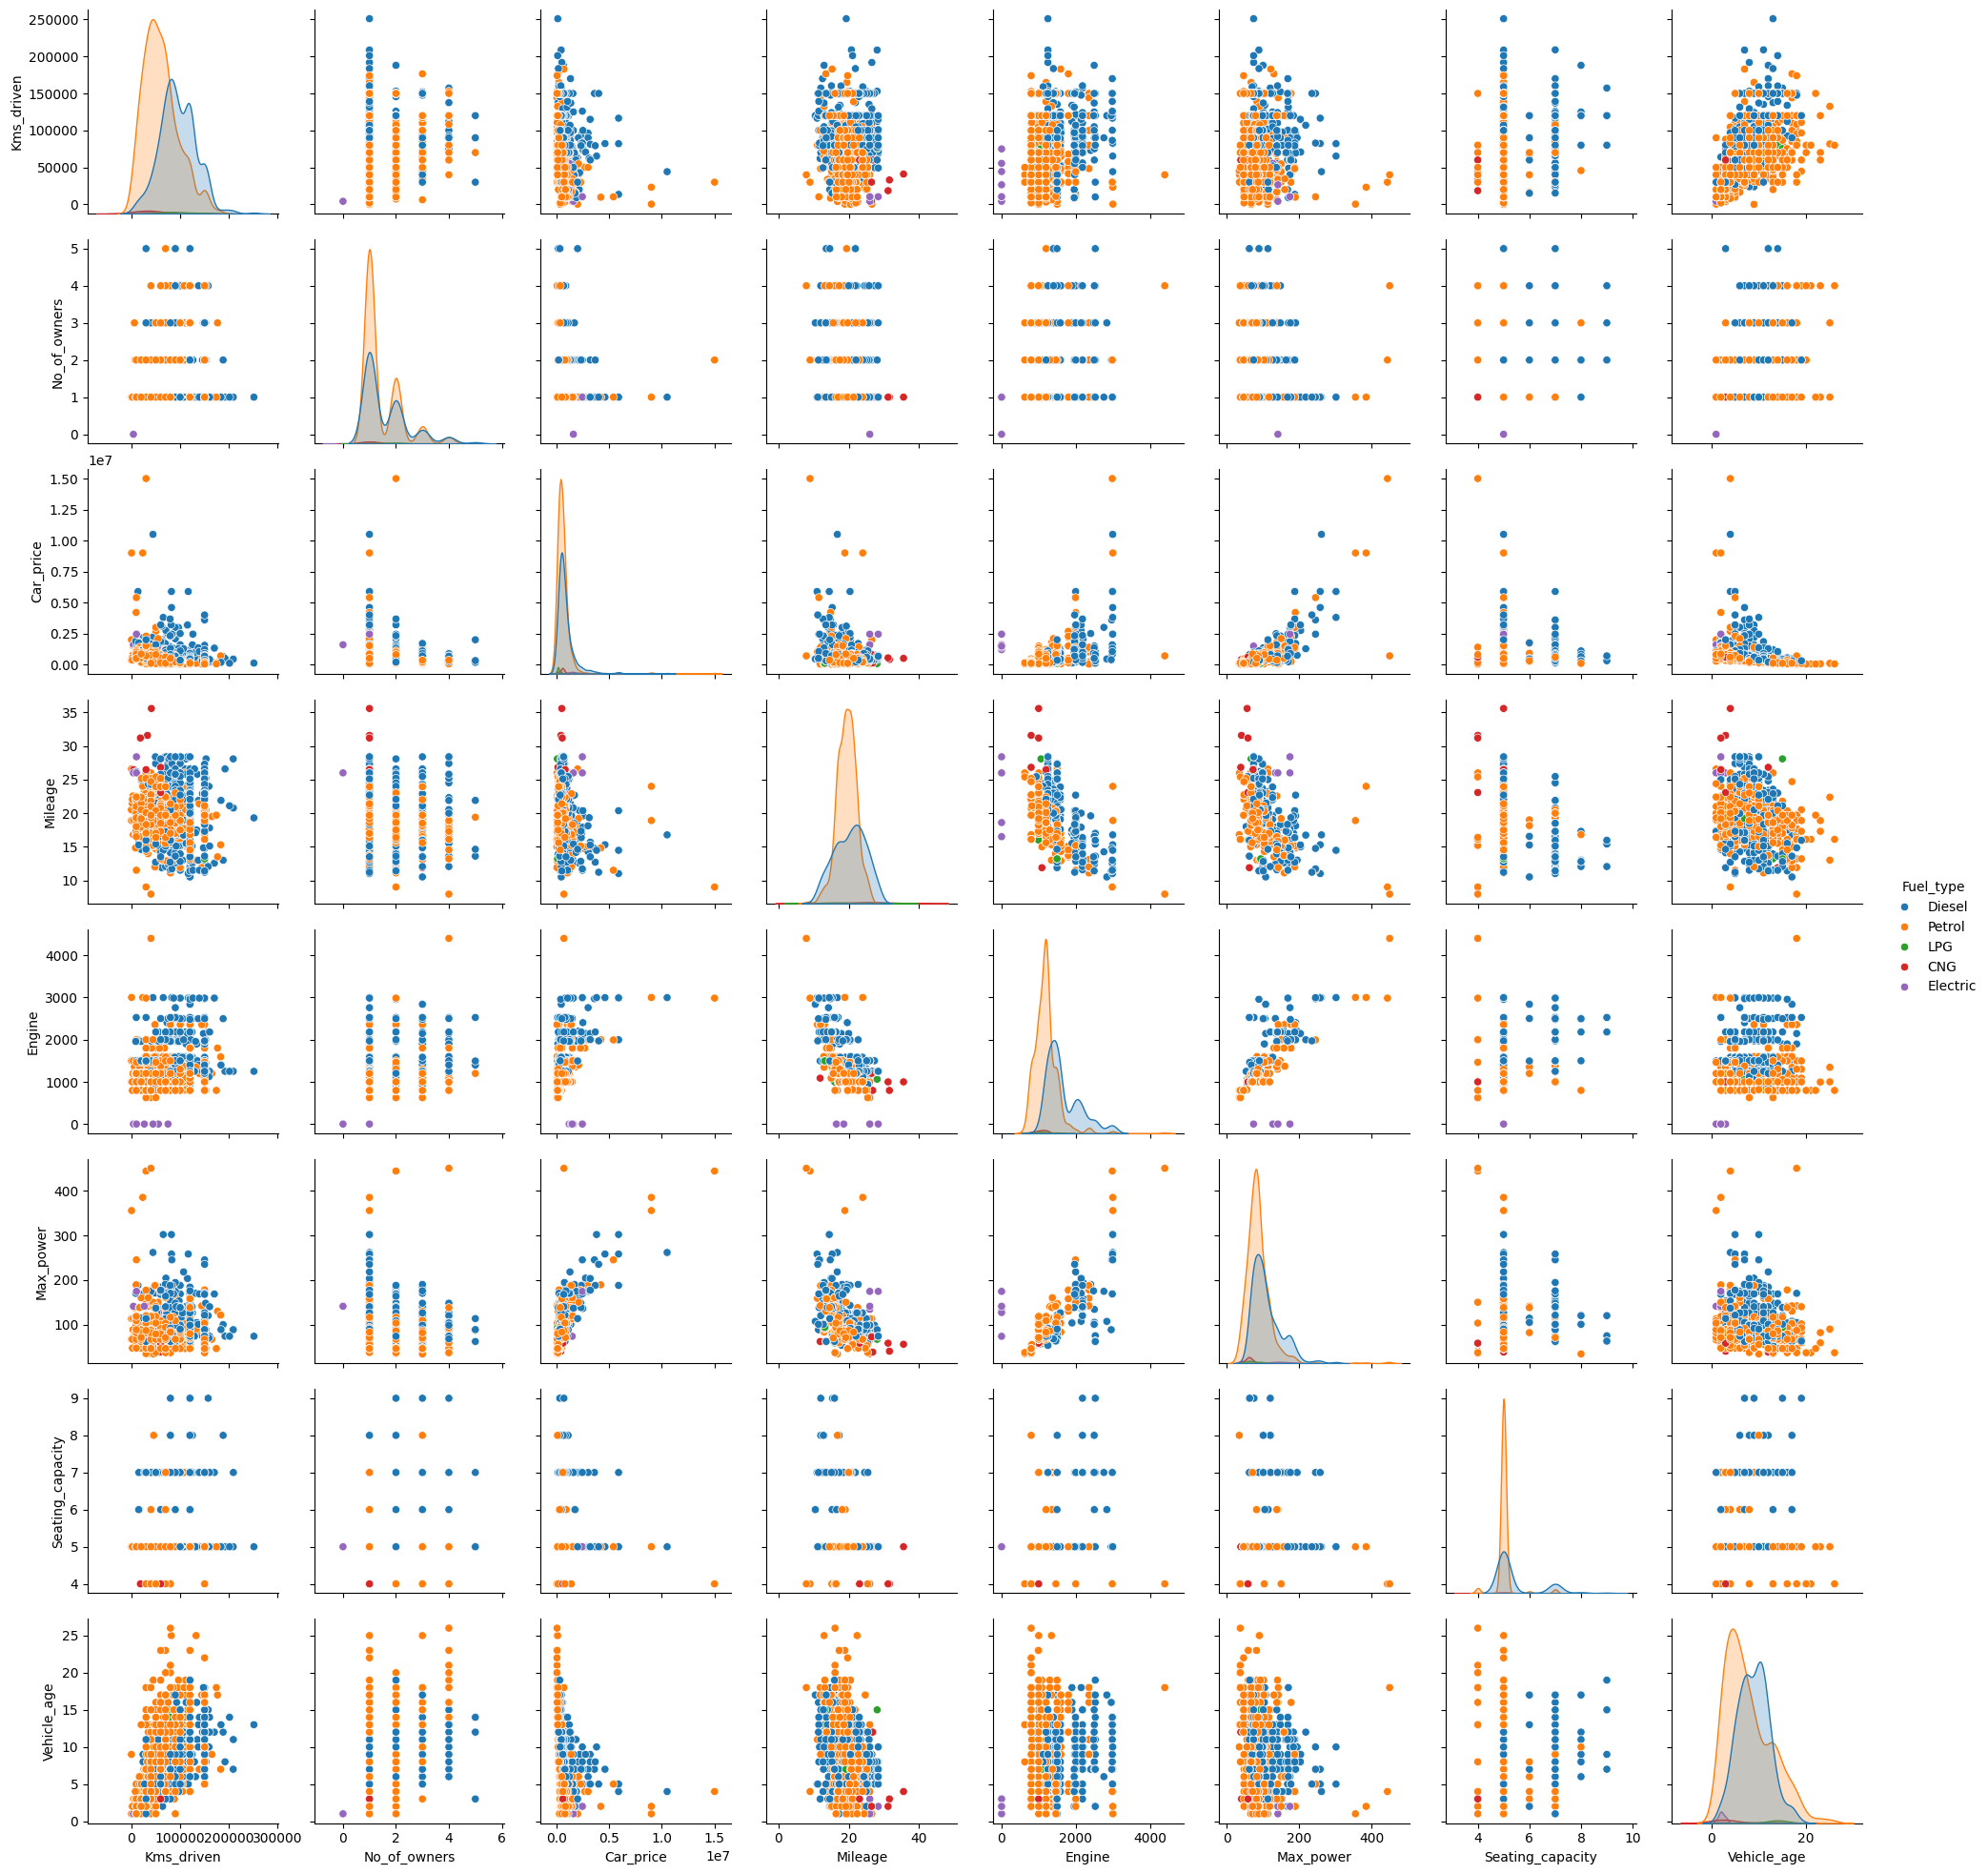

In [22]:
sns.pairplot(data=data_next, hue= 'Fuel_type', diag_kind= 'kde')

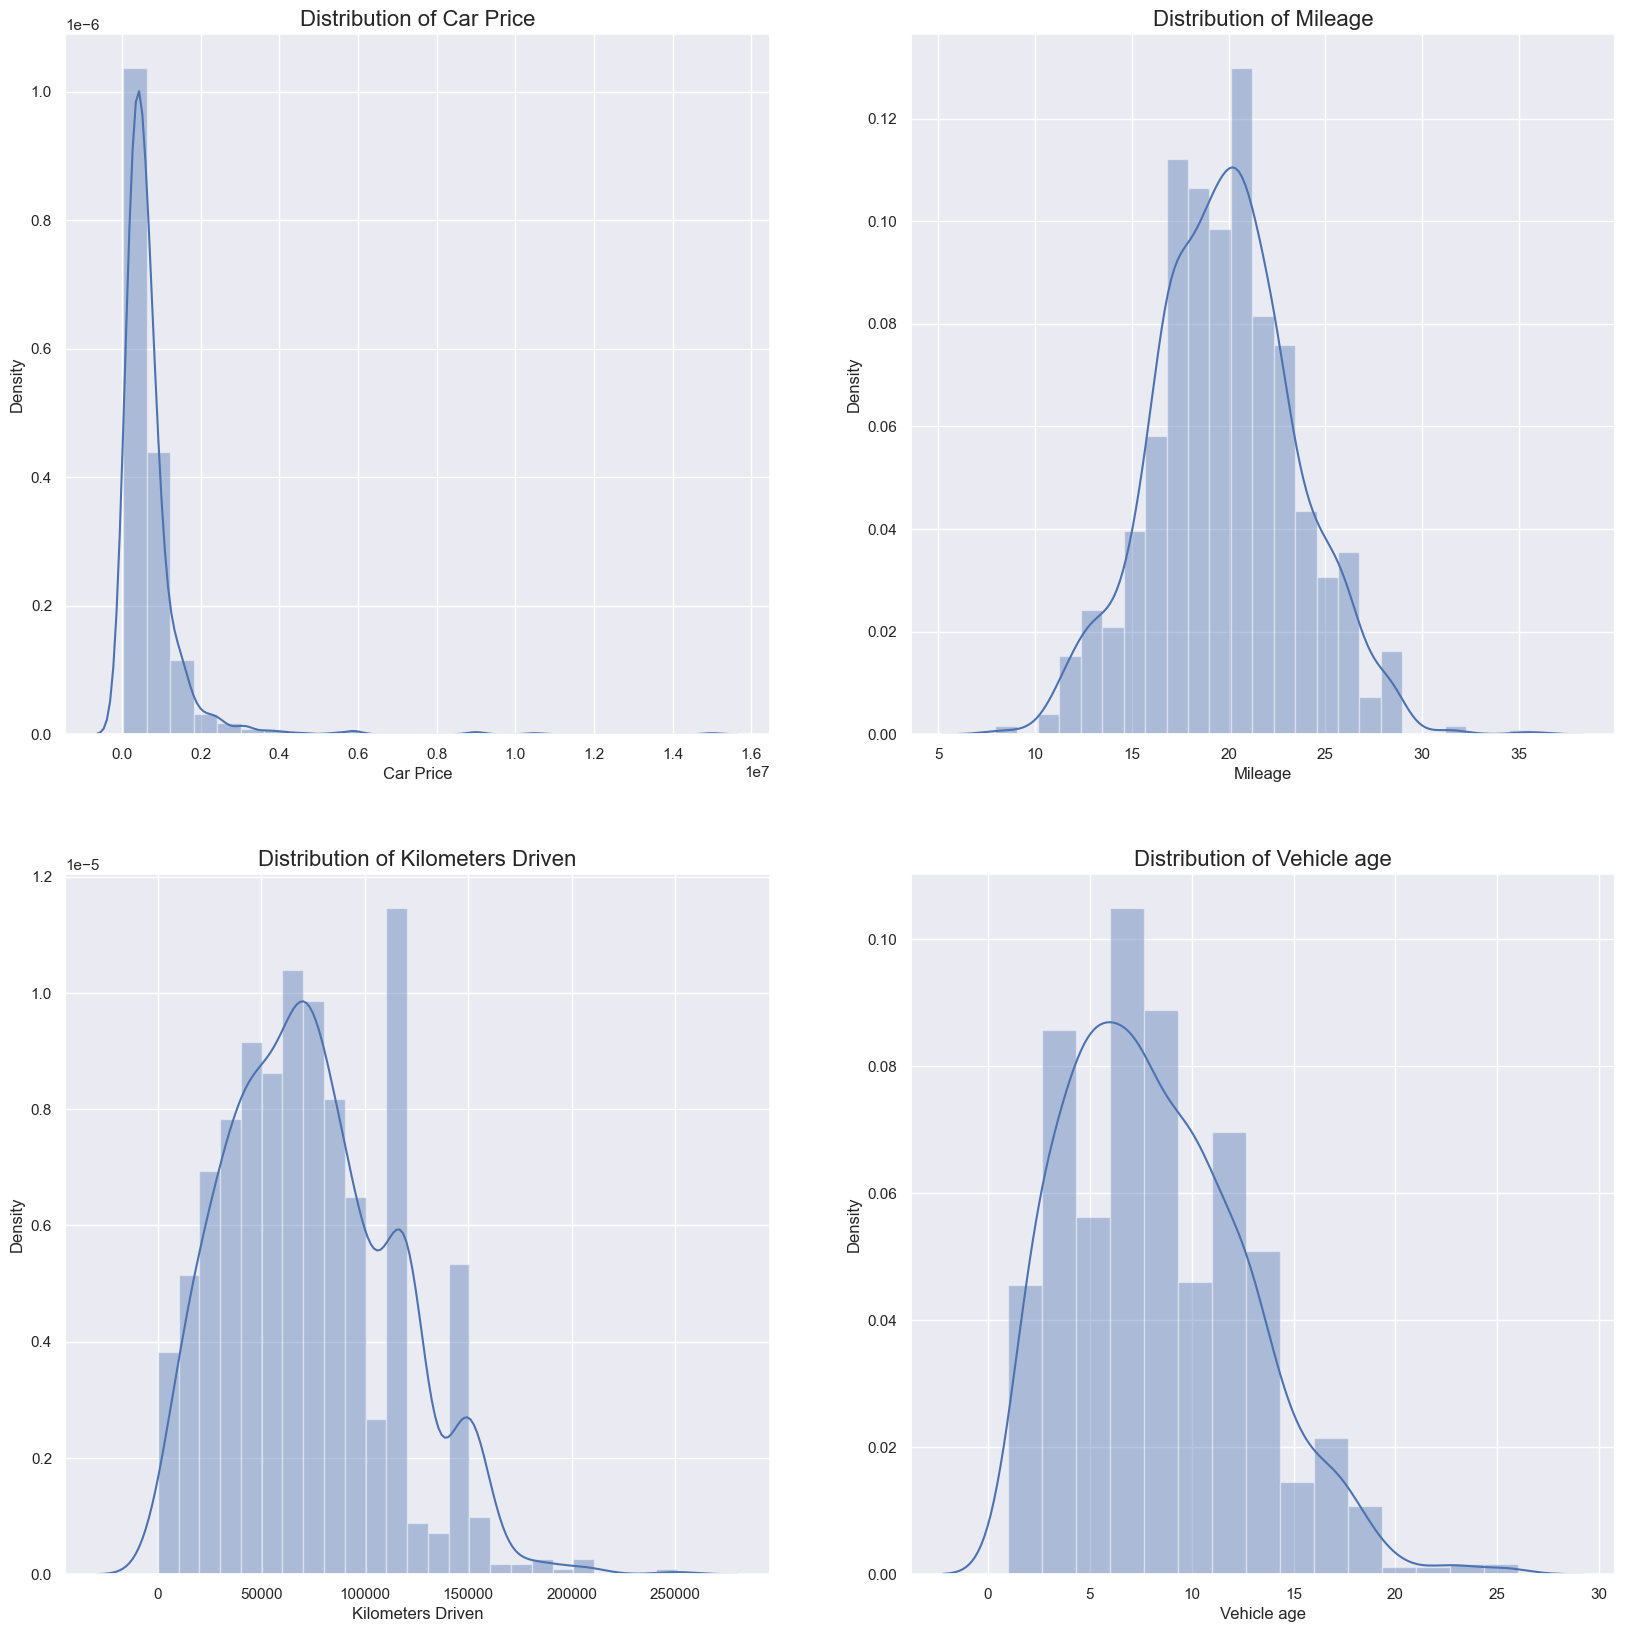

In [23]:
# Let's see the distribution of the variables from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Distplot of 'Selling_Price' feature
k1 = sns.distplot(a = data_next['Car_price'], bins= 25, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Car Price', fontsize=16)
ax0.set(xlabel= 'Car Price', ylabel= 'Density')

# Subplot 2: Distplot of 'Mileage' feature
k2 = sns.distplot(a = data_next['Mileage'], bins= 25, ax=ax1) # add to subplot 2           
ax1.set_title('Distribution of Mileage', fontsize=16)
ax1.set(xlabel= 'Mileage', ylabel= 'Density')

# Subplot 3: Distplot of 'Kms_Driven' feature
k1 = sns.distplot(a = data_next['Kms_driven'], bins= 25, ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Kilometers Driven', fontsize=16)
ax2.set(xlabel= 'Kilometers Driven', ylabel= 'Density')

# Subplot 4: Distplot of 'No_of_Years' feature
k1 = sns.distplot(a = data_next['Vehicle_age'], bins= 15, ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Vehicle age', fontsize=16)
ax3.set(xlabel= 'Vehicle age', ylabel= 'Density')

plt.show()
#fig.savefig("Distributionplot.png")


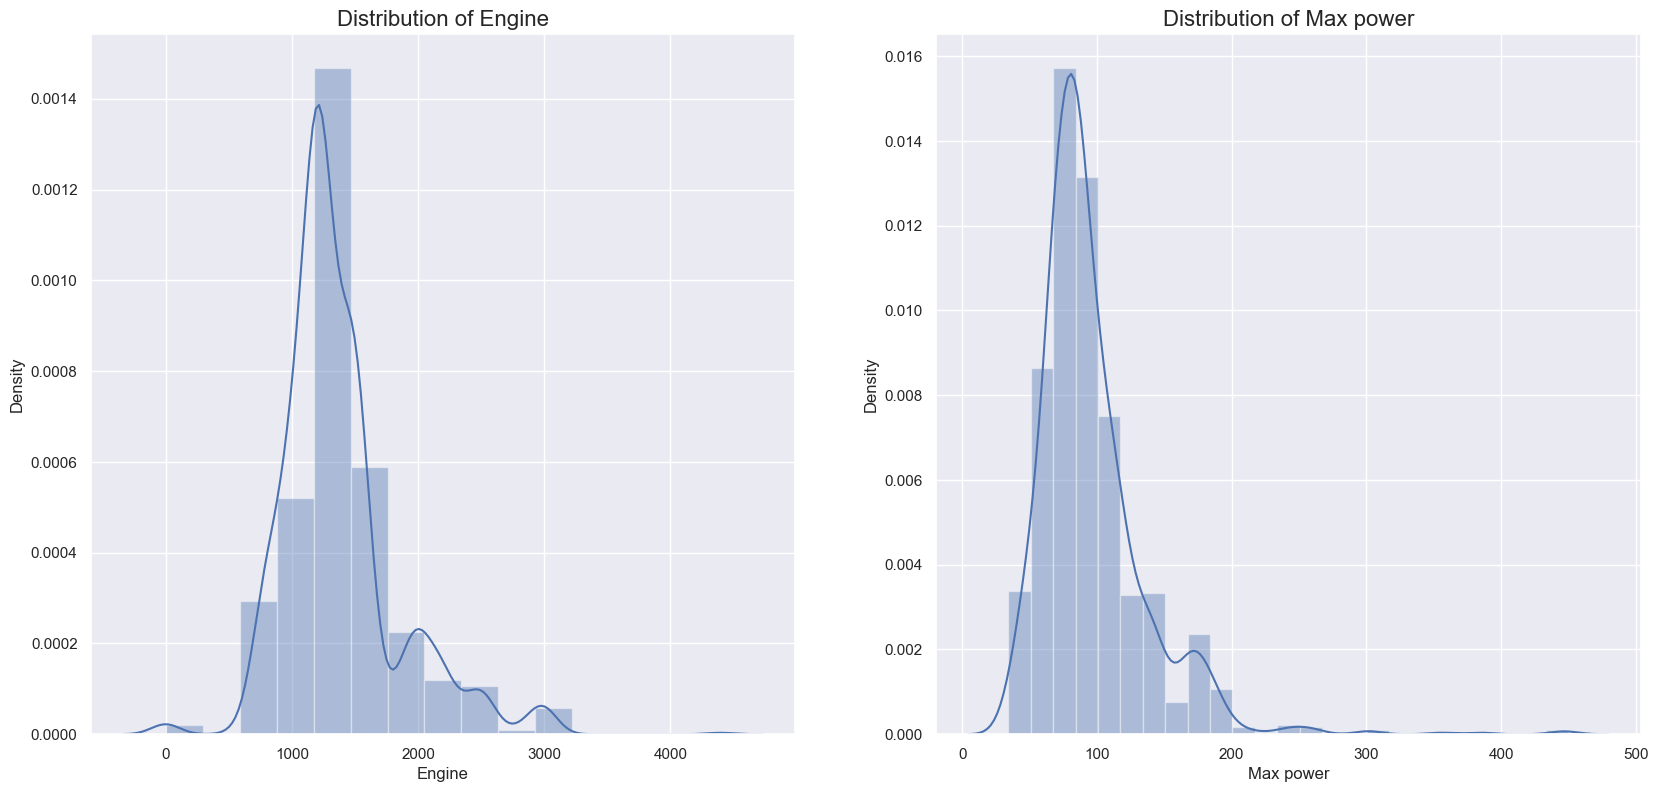

In [24]:
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)

# Subplot 5: Distplot of 'Engine' feature
k1 = sns.distplot(a = data_next['Engine'], bins= 15, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Engine', fontsize=16)
ax0.set(xlabel= 'Engine', ylabel= 'Density')

# Subplot 6: Distplot of 'Max power' feature
k2 = sns.distplot(a = data_next['Max_power'], bins=25, ax=ax1) # add to subplot 2
ax1.set_title('Distribution of Max power', fontsize=16)
ax1.set(xlabel= 'Max power', ylabel= 'Density')

plt.show()
#fig.savefig("Distributionplot.png")

In [25]:
data_next.head()

,Car_type,Kms_driven,No_of_owners,Car_price,Fuel_type,Insurance_type,Transmission,Mileage,Engine,Max_power,Seating_capacity,Vehicle_age
0,Hatchback,120000,2,509999,Diesel,Third Party insurance,Manual,22.54,1396,88.73,5,9
1,Hatchback,66951,1,381000,Petrol,Third Party,Manual,22.38,1197,88.50,5,12
2,Hatchback,80000,2,320000,Petrol,Third Party insurance,Automatic,23.10,998,67.04,5,8
3,Hatchback,44392,1,420000,Petrol,Third Party insurance,Manual,18.90,1197,81.86,5,7
4,Hatchback,40000,1,350000,Petrol,Third Party insurance,Automatic,20.51,998,67.00,5,8


In [26]:
cols = data_next.columns.tolist()
cols=cols[4:7]+cols[:1]
cols


['Fuel_type', 'Insurance_type', 'Transmission', 'Car_type']

In [27]:
cat_col = list(cols)
cat_col

['Fuel_type', 'Insurance_type', 'Transmission', 'Car_type']

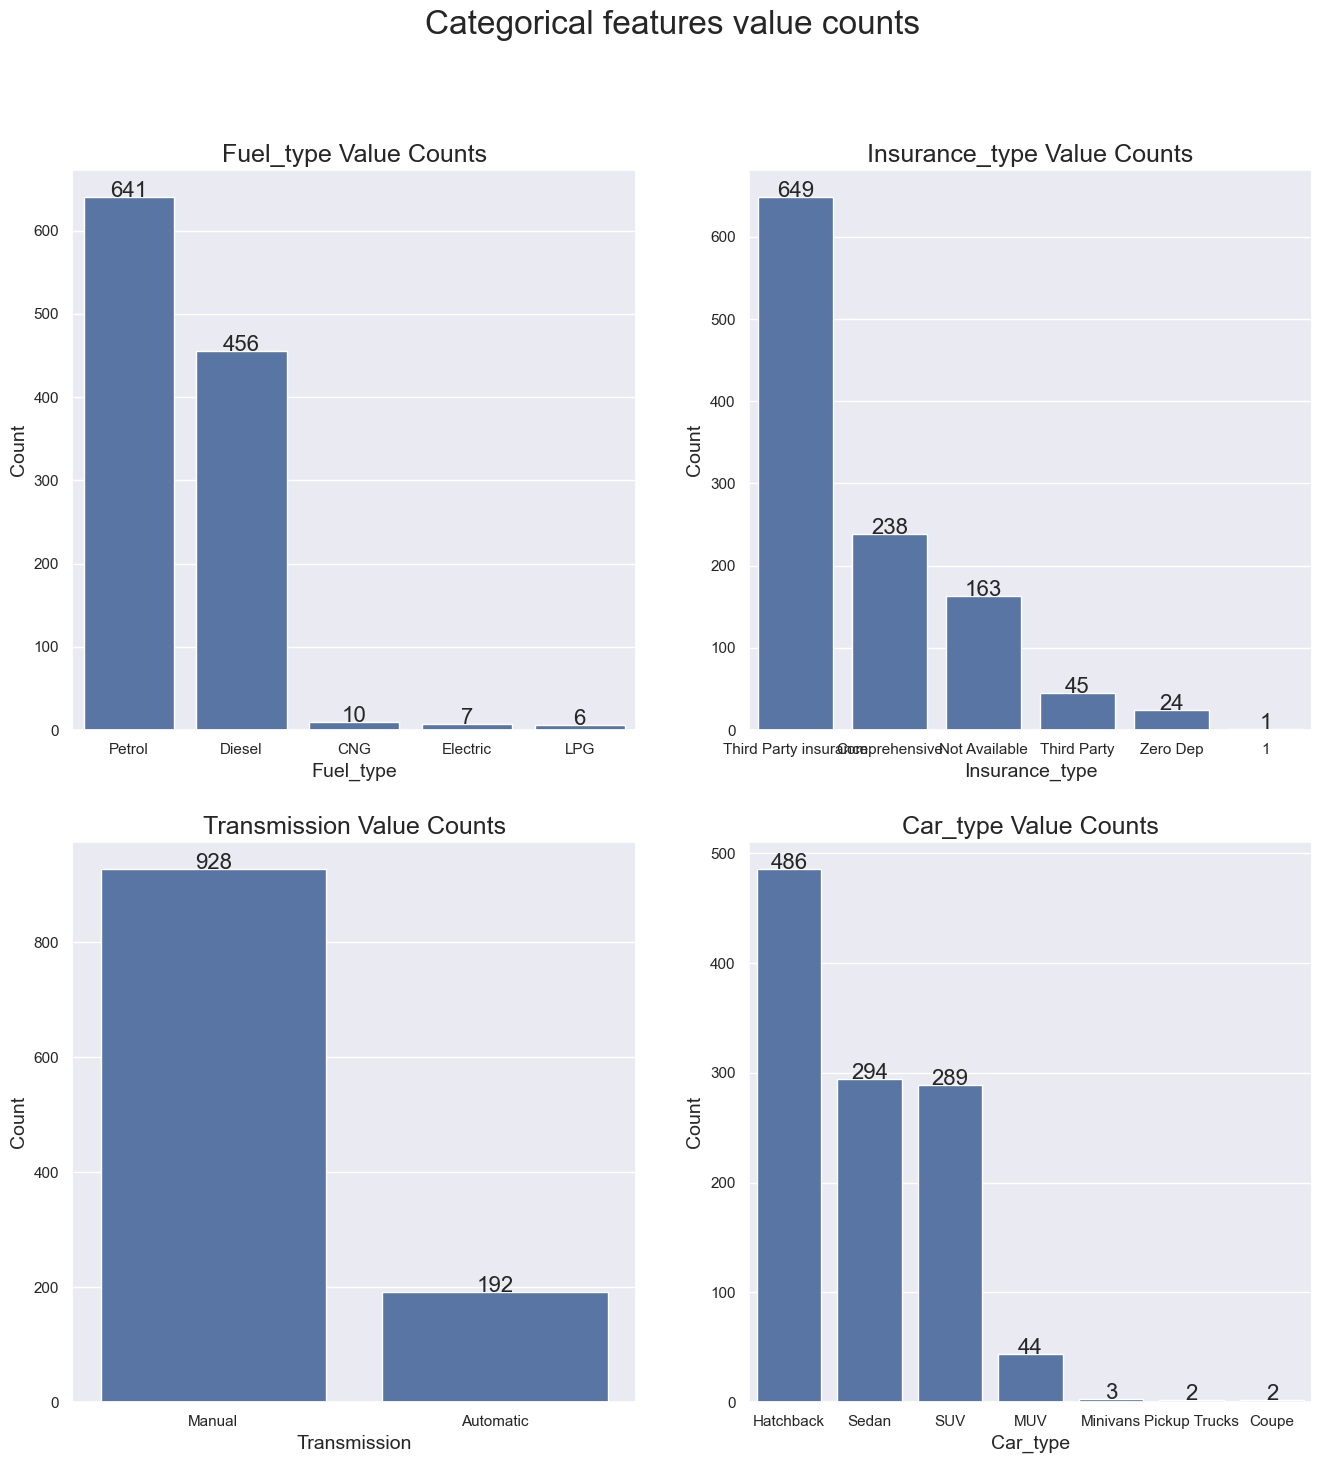

In [28]:
cols = data_next.columns.tolist()
cols=cols[4:7]+cols[:1]
cat_col = list(cols)

fig = plt.figure(figsize= (16,16))
plt.suptitle('Categorical features value counts', fontsize = 24)
k=0
for i in range(1,5):
    ax = fig.add_subplot(2,2,i) 
    cat_order = data_next[cat_col[k]].value_counts()
    sns.countplot(data = data_next, x = cat_col[k], order = cat_order.index, ax= ax) 
    plt.xlabel(cat_col[k], fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('{} Value Counts'.format(cat_col[k]), fontsize=18)
    
    for j in range(cat_order.shape[0]):
        count = cat_order[j]
        strt='{}'.format(count)
        plt.text(j,count+0.1,strt,ha='center', fontsize=16)
    k=k+1